<h1> Pandas Notebook </h1>

In [ ]:
# source : https://www.youtube.com/watch?v=5JnMutdy6Fw

In [11]:
%matplotlib inline
import pandas as pd

In [12]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [17]:
%%time
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)


/home/vubuntu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':


CPU times: user 5.68 s, sys: 192 ms, total: 5.87 s
Wall time: 5.69 s


In [18]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [14]:
%%time
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)

CPU times: user 580 ms, sys: 8 ms, total: 588 ms
Wall time: 562 ms


In [15]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [16]:
titles = pd.DataFrame.from_csv(
'data/titles.csv',index_col = None,encoding = 'utf-8',)
titles.head()

/home/vubuntu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  from ipykernel import kernelapp as app


,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [19]:
titles.tail()

,title,year
244909,E yue,2005
244910,Lakota Girls,2015
244911,Kroniki domowe,1997
244912,Awakening the Zodiac,2017
244913,American Satan,2017


In [26]:
h = titles.head(8) # head() gives another dataframe
h

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017
5,Huang jia ni gu,1990
6,Gaiking II,2011
7,Medusa (IV),2015


In [27]:
h.head() # which is again a subset of the head dataframe

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [28]:
h.head().head(3) # which is again a subset of the above head dataframe

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949


In [29]:
h['title'] 

0             The Rising Son
1    The Thousand Plane Raid
2     The Spider and the Fly
3                    Country
4            The Golden Note
5            Huang jia ni gu
6                 Gaiking II
7                Medusa (IV)
Name: title, dtype: object

In [30]:
h['year']

0    1990
1    1969
2    1949
3    2000
4    2017
5    1990
6    2011
7    2015
Name: year, dtype: int64

In [31]:
h['year'] + 10000

0    11990
1    11969
2    11949
3    12000
4    12017
5    11990
6    12011
7    12015
Name: year, dtype: int64

In [32]:
h.year # accessing data with the column nates as attributes (provided the names shouldn't have spaces)

0    1990
1    1969
2    1949
3    2000
4    2017
5    1990
6    2011
7    2015
Name: year, dtype: int64

In [33]:
h.year > 2000

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7     True
Name: year, dtype: bool

In [45]:
h.year < 1990

0    False
1     True
2     True
3    False
4    False
5    False
6    False
7    False
Name: year, dtype: bool

In [34]:
h[h.year>2000]

,title,year
4,The Golden Note,2017
6,Gaiking II,2011
7,Medusa (IV),2015


In [37]:
h[h.year>2000 or h.year<1990]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [39]:
h[h.year>2000 and h.year<1990] # python takes a single value (1 or 0) from both the sides and gives 'and' of both
# but here h.year>2000 is a series of True or False and so is h.year<1990 
# these series can't give a single boolean value for 'and' or 'or' operation, hence throws an erro

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [49]:
h[(h.year>2000) | (h.year<1990)] # this is bit-wise operation, hence works 
# note : () for condition is mandatory, ie, () & ()

,title,year
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
4,The Golden Note,2017
6,Gaiking II,2011
7,Medusa (IV),2015


In [50]:
h[(h.year>2000) & (h.year<1990)]

,title,year


In [51]:
t = titles
t[t.title=='MMacbethacbeth']

,title,year
4407,Macbeth,1913
12245,Macbeth,2013
17973,Macbeth,1997
47807,Macbeth,2018
58888,Macbeth,2006
71411,Macbeth,1916
91697,Macbeth,2003
110636,Macbeth,2014
133221,Macbeth,2015
140102,Macbeth,2004


In [52]:
t[t.title=='Macbeth']['year']

4407      1913
12245     2013
17973     1997
47807     2018
58888     2006
71411     1916
91697     2003
110636    2014
133221    2015
140102    2004
149536    1948
150816    2012
159718    2009
166888    1998
195292    2017
215678    1987
Name: year, dtype: int64

In [56]:
t[t.title=='Macbeth'].sort_values('year')

,title,year
4407,Macbeth,1913
71411,Macbeth,1916
149536,Macbeth,1948
215678,Macbeth,1987
17973,Macbeth,1997
166888,Macbeth,1998
91697,Macbeth,2003
140102,Macbeth,2004
58888,Macbeth,2006
159718,Macbeth,2009


In [57]:
t[t.title=='Macbeth'].sort_values('year').head(3)

,title,year
4407,Macbeth,1913
71411,Macbeth,1916
149536,Macbeth,1948


In [58]:
t[t.title=='Macbeth'].sort_values('year').tail(5)

,title,year
12245,Macbeth,2013
110636,Macbeth,2014
133221,Macbeth,2015
195292,Macbeth,2017
47807,Macbeth,2018


In [70]:
t.year.sort_values().head()

187327    1894
226857    1898
131240    1899
193369    1900
100010    1900
Name: year, dtype: int64

In [71]:
t.sort_values('year').head()

,title,year
187327,Miss Jerry,1894
226857,The Startled Lover,1898
131240,Reproduction of the Corbett and Jeffries Fight,1899
193369,Soldiers of the Cross,1900
100010,Trouble in Hogan's Alley,1900


In [74]:
pd.__version__

u'0.23.3'

In [76]:
h = cast.head()
h

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [91]:
h = cast.head()
h = h[h.n.notnull()].sort_values('year')
h

,title,year,name,type,character,n
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


In [94]:
h = cast.head()
h = h[h.n.notnull()]
h = h[h.year>2000]
h

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


In [89]:
h = cast.head()
h = h[h.n.isnull()]
h

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [96]:
'Hamlet II'.startswith('Hamlet')

True

In [110]:
c = titles
# c[c.title.str.startswith('The')]
c[c.title.str.startswith('The')].count()

title    24404
year     24404
dtype: int64

In [112]:
# c[c.title.str.contains('The')]
c[c.title.str.contains('The')].count()

title    27056
year     27056
dtype: int64

In [114]:
c.title.str.len()

0         14
1         23
2         22
3          7
4         15
5         15
6         10
7         11
8         30
9         18
10        10
11        13
12        22
13        13
14        32
15        20
16        24
17         9
18        15
19        10
20        21
21        22
22        10
23        16
24         6
25        14
26        27
27        20
28        13
29        28
          ..
244884    20
244885    29
244886    12
244887    17
244888     9
244889    19
244890    21
244891    34
244892    23
244893    23
244894    16
244895    23
244896    14
244897    26
244898    22
244899    20
244900    18
244901     7
244902    26
244903    27
244904     7
244905    18
244906    14
244907    21
244908    18
244909     5
244910    12
244911    14
244912    20
244913    14
Name: title, Length: 244914, dtype: int64

In [115]:
titles.year.value_counts() # gives no of movies of each year

2017    11474
2016     9440
2015     8702
2014     8264
2018     8041
2013     7896
2012     7398
2011     6988
2010     6415
2009     6125
2008     5151
2007     4467
2006     4296
2005     4030
2004     3512
2003     3177
2002     3019
2001     2896
2000     2779
1999     2579
1998     2459
1997     2396
1988     2390
1990     2364
1991     2318
1989     2307
1987     2306
1992     2230
1970     2225
1969     2217
        ...  
1924      811
1946      806
1929      790
1943      780
1923      756
1944      733
1945      656
1914      573
1913      250
2020      220
1912      113
1911       53
2021       34
1910       23
2022       18
1909       16
2024        6
1908        6
1900        5
2023        5
1906        5
1907        4
1905        2
1903        1
1899        1
2026        1
1894        1
1898        1
2025        1
2115        1
Name: year, Length: 128, dtype: int64

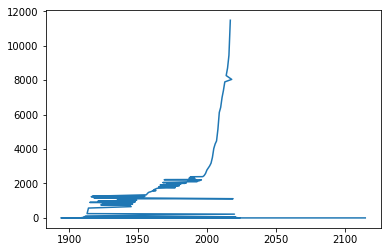

In [116]:
titles.year.value_counts().plot()

In [119]:
titles.year.value_counts().sort_index()

1894        1
1898        1
1899        1
1900        5
1903        1
1905        2
1906        5
1907        4
1908        6
1909       16
1910       23
1911       53
1912      113
1913      250
1914      573
1915      902
1916     1234
1917     1262
1918     1163
1919     1226
1920     1166
1921      984
1922      907
1923      756
1924      811
1925      901
1926      894
1927      917
1928      908
1929      790
        ...  
1998     2459
1999     2579
2000     2779
2001     2896
2002     3019
2003     3177
2004     3512
2005     4030
2006     4296
2007     4467
2008     5151
2009     6125
2010     6415
2011     6988
2012     7398
2013     7896
2014     8264
2015     8702
2016     9440
2017    11474
2018     8041
2019     1115
2020      220
2021       34
2022       18
2023        5
2024        6
2025        1
2026        1
2115        1
Name: year, Length: 128, dtype: int64

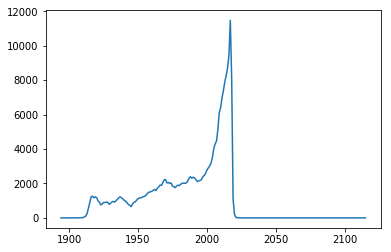

In [120]:
titles.year.value_counts().sort_index().plot()

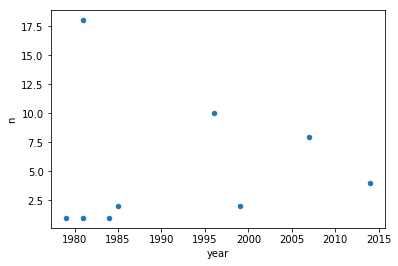

In [123]:
c = cast
c = c[c.character == 'Kermit the Frog']
c.plot(x='year',y='n',kind='scatter')

In [125]:
c.head()

,title,year,name,type,character,n
982460,An American Werewolf in London,1981,Jim Henson,actor,Kermit the Frog,18.0
982461,Follow That Bird,1985,Jim Henson,actor,Kermit the Frog,2.0
982466,The Great Muppet Caper,1981,Jim Henson,actor,Kermit the Frog,1.0
982474,The Muppet Movie,1979,Jim Henson,actor,Kermit the Frog,1.0
982481,The Muppets Take Manhattan,1984,Jim Henson,actor,Kermit the Frog,1.0


In [124]:
c.head()[['year','n']]

,year,n
982460,1981,18.0
982461,1985,2.0
982466,1981,1.0
982474,1979,1.0
982481,1984,1.0


In [129]:
%%time
cast[cast.title=='Sleuth']

CPU times: user 356 ms, sys: 0 ns, total: 356 ms
Wall time: 365 ms


,title,year,name,type,character,n
260242,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
326773,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
326774,Sleuth,2007,Michael Caine,actor,Andrew,1.0
373876,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
373877,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1293634,Sleuth,2007,Jude Law,actor,Milo,2.0
1448690,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1465483,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1705394,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1805907,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [130]:
len(cast)

3786176

In [132]:
c = cast.set_index('title')
c

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0


In [133]:
c.loc['Sleuth']

,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2.0
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0


In [136]:
c = cast.set_index(['title','year']).sort_index()
c

name     type  \
title                   year                                     
#1 Serial Killer        2013            Michael Alton    actor   
                        2013               Aaron Aoki    actor   
                        2013        Zachary (X) Brown    actor   
                        2013           Yvis Cannavale    actor   
                        2013            Patrick Chien    actor   
                        2013          Matthias Chrans    actor   
                        2013          Robert Cicchini    actor   
                        2013           Scott Eriksson    actor   
                        2013             Rane Jameson    actor   
                        2013                   Tzi Ma    actor   
                        2013           Thomas McCurdy    actor   
                        2013     Thomas Isao Morinaka    actor   
                        2013               Parry Shen    actor   
                        2013       Eric (II) St. John    actor   
                        2013          Brian Takahashi    actor   
                        2013              Timothy Tau    actor   
                        2013              Jason Tobin    actor   
                        2013               Jesse Wang    actor   
                        2013          Romina Bovolini  actress   
                        2013            Shoshana Bush  actress   
                        2013           Kasie Callaway  actress   
                        2013               Tiley Chao  actress   
                        2013              Cindera Che  actress   
                        2013            Kylee Cochran  actress   
                        2013            Kenzie Dalton  actress   
                        2013          Christie Gaynor  actress   
                        2013            Ellen (II) Ho  actress   
                        2013                Jinxia Ma  actress   
                        2013             Gemma Massot  actress   
                        2013             Eugenia Yuan  actress   
...                                               ...      ...   
xXx: State of the Union 2005         Rick (II) Voight    actor   
                        2005         Glen (II) Walker    actor   
                        2005       James D. Weston II    actor   
                        2005              Don Whatley    actor   
                        2005                   Xzibit    actor   
                        2005         Krystal Browning  actress   
                        2005              Mary Castro  actress   
                        2005               Eos Chater  actress   
                        2005              Tania Davis  actress   
                        2005             Haylie Ecker  actress   
                        2005                Nona Gaye  actress   
                        2005        Priscilla Hopkins  actress   
                        2005  Courtney Mykelle Howard  actress   
                        2005              Lisa Joyner  actress   
                        2005              Tia Latrell  actress   
                        2005         Danielle Lazarus  actress   
                        2005             Sunny Mabrey  actress   
                        2005               Sarah Mack  actress   
                        2005              Masuimi Max  actress   
                        2005               Gwen Mihok  actress   
                        2005             Leyna Nguyen  actress   
                        2005             Oksana Orlan  actress   
                        2005                 Lil Rhee  actress   
                        2005             Toni Russell  actress   
                        2005            Jeanne Sakata  actress   
                        2005         Deborah S. Smith  actress   
                        2005            Gina St. John  actress   
                        2005       Paola (III) Torres  actress   
                       

In [137]:
c.loc['Sleuth']

,name,type,character,n
year,,,,
1972,Michael Caine,actor,Milo Tindle,2.0
1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1972,Teddy Martin,actor,Police Constable Higgs,6.0
1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1972,Laurence Olivier,actor,Andrew Wyke,1.0
1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
2007,Michael Caine,actor,Andrew,1.0
2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN


In [142]:
#c.loc['Sleuth'].loc[1972]
c.loc[('Sleuth',1972)]

name     type                   character    n
title  year                                                              
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2.0
       1972      Alec Cawthorne    actor           Inspector Doppler  3.0
       1972        Teddy Martin    actor      Police Constable Higgs  6.0
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier    actor                 Andrew Wyke  1.0
       1972  Eve (III) Channing  actress             Marguerite Wyke  5.0

In [143]:
c.loc[('Sleuth',1972)].reset_index('year') # reset_index is the opposite of the et_index operation

,year,name,type,character,n
title,,,,,
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [144]:
c.loc[('Sleuth',1972)].reset_index('title')

,title,name,type,character,n
year,,,,,
1972,Sleuth,Michael Caine,actor,Milo Tindle,2.0
1972,Sleuth,Alec Cawthorne,actor,Inspector Doppler,3.0
1972,Sleuth,Teddy Martin,actor,Police Constable Higgs,6.0
1972,Sleuth,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1972,Sleuth,Laurence Olivier,actor,Andrew Wyke,1.0
1972,Sleuth,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [146]:
c.loc[('Sleuth',1972)].reset_index(['title','year'])

,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
3,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
4,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
5,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [147]:
#  Groupby

In [149]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['title','year','character']).size() # hierarchial sorting.. title->year->character

title                               year  character               
Batman & Robin                      1997  Batman                      1
                                          Bruce Wayne                 1
Burn After Reading                  2008  Harry Pfarrer               1
Confessions of a Dangerous Mind     2002  Jim Byrd                    1
Curdled                             1996  Seth Gecko                  1
Fantastic Mr. Fox                   2009  Mr. Fox                     1
From Dusk Till Dawn                 1996  Seth Gecko                  1
Good Night, and Good Luck.          2005  Fred Friendly               1
Gravity                             2013  Matt Kowalski               1
Grizzly II: The Concert             1983  Ron                         1
Hail, Caesar!                       2016  Baird Whitlock              1
Intolerable Cruelty                 2003  Miles                       1
Leatherheads                        2008  Dodge Connelly             

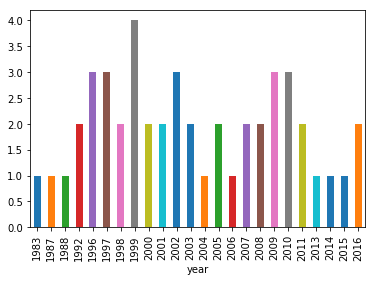

In [152]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['year']).size().plot(kind='bar')

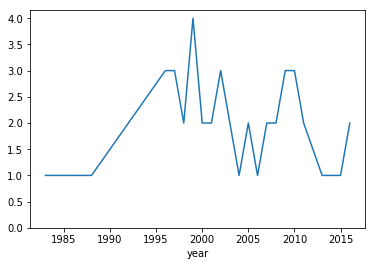

In [153]:
c.groupby(['year']).size().plot(ylim=0)

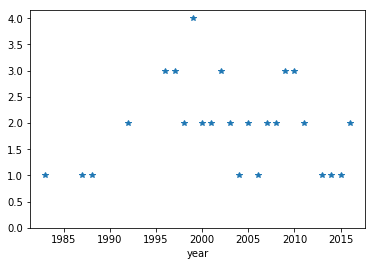

In [154]:
c.groupby(['year']).size().plot(ylim=0,style='*')

In [155]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['year']).n.min()

year
1983     NaN
1987    15.0
1988     2.0
1992     5.0
1996     1.0
1997     1.0
1998     1.0
1999     1.0
2000     1.0
2001     1.0
2002     1.0
2003     1.0
2004     3.0
2005     2.0
2006     1.0
2007     1.0
2008     1.0
2009     1.0
2010     1.0
2011     1.0
2013     2.0
2014     1.0
2015     1.0
2016     1.0
Name: n, dtype: float64

In [156]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby([c.year//10*10]).n.size() # his movies per decade

year
1980     3
1990    14
2000    20
2010    10
Name: n, dtype: int64

In [165]:
c = cast
c = c[c.name == 'George Clooney']
c = c[(c.year>1990)&(c.year<2000)]
c

,title,year,name,type,character,n
435716,Batman & Robin,1997,George Clooney,actor,Batman,2.0
435717,Batman & Robin,1997,George Clooney,actor,Bruce Wayne,2.0
435720,Curdled,1996,George Clooney,actor,Seth Gecko,NaN
435722,From Dusk Till Dawn,1996,George Clooney,actor,Seth Gecko,1.0
435736,One Fine Day,1996,George Clooney,actor,Jack Taylor,2.0
435737,Out of Sight,1998,George Clooney,actor,Jack Foley,1.0
435741,"South Park: Bigger, Longer & Uncut",1999,George Clooney,actor,Dr. Gouache,11.0
435747,The Book That Wrote Itself,1999,George Clooney,actor,Himself,NaN
435750,The Harvest,1992,George Clooney,actor,Lip Syncing Transvestite,23.0
435752,The Limey,1999,George Clooney,actor,Himself,NaN


In [166]:
c = cast
c.groupby([c.year//10*10,'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27605
      actress     15830
1920  actor       48726
      actress     24075
1930  actor      151290
      actress     49972
1940  actor      162364
      actress     51795
1950  actor      157738
      actress     57733
1960  actor      134605
      actress     57744
1970  actor      152811
      actress     66974
1980  actor      197530
      actress     91509
1990  actor      263000
      actress    125040
2000  actor      489468
      actress    263941
2010  actor      747346
      actress    448737
2020  actor         140
      actress       127
2110  actor           2
      actress         1
dtype: int64

In [169]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
g = c.groupby(['character',c.year//10*10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [170]:
g.unstack()

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [173]:
u = g.unstack(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,NaN
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,NaN


In [172]:
g.unstack(1)

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [174]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    NaN
1980    2.0
1990    1.0
2000    0.0
2010    NaN
dtype: float64

In [175]:
u.stack()

year  character       
1970  Kermit the Frog     1.0
1980  Kermit the Frog     4.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
dtype: float64

In [176]:
u = g.unstack(0).fillna('') # replaces NaN with ''
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,
1980,4.0,2
1990,2.0,1
2000,1.0,1
2010,1.0,


In [177]:
u = g.unstack(0).fillna(0) # replaces NaN with 0
u 

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [178]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    1.0
1980    2.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64

In [179]:
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [180]:
g.unstack('year')

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [181]:
g.unstack('year').unstack('character')

year  character       
1970  Kermit the Frog     1.0
      Oscar the Grouch    NaN
1980  Kermit the Frog     4.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
      Oscar the Grouch    NaN
dtype: float64

In [182]:
g.unstack('character').unstack('year')

character         year
Kermit the Frog   1970    1.0
                  1980    4.0
                  1990    2.0
                  2000    1.0
                  2010    1.0
Oscar the Grouch  1970    NaN
                  1980    2.0
                  1990    1.0
                  2000    1.0
                  2010    NaN
dtype: float64

In [184]:
g.unstack('character').stack()

year  character       
1970  Kermit the Frog     1.0
1980  Kermit the Frog     4.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
dtype: float64

In [195]:
g.unstack('character').unstack('year') # has nothung else on left side, so simply displays as follows.
# so let us add a column called 'extra' as shown in the below cell

character         year
Kermit the Frog   1970    1.0
                  1980    4.0
                  1990    2.0
                  2000    1.0
                  2010    1.0
Oscar the Grouch  1970    NaN
                  1980    2.0
                  1990    1.0
                  2000    1.0
                  2010    NaN
dtype: float64

In [197]:
# important
# shift + enter each line in this cell, commenting others, for a better understanding
df = g.unstack('character')
df['extra']=1
df = df.set_index('extra',drop=True,append=True) # drop = True -> drops the column at last, append=True -> appends this index to the existing indices
df.unstack(0)

character Kermit the Frog                     Oscar the Grouch                 \
year                 1970 1980 1990 2000 2010             1970 1980 1990 2000   
extra                                                                           
1                     1.0  4.0  2.0  1.0  1.0              NaN  2.0  1.0  1.0   

character       
year      2010  
extra           
1          NaN